# DOUBLES DIFFERENCES

Cette application est inspirée de l'article de K. A. Kiel and K. T. McClain (1995) : "The Effect of an Incinerator Siting on Housing Appreciation Rates", *Journal of Urban Economics*, 37(3):311-323, et du manuel de Wooldridge (voir bibliographie du cours).

Kiel et McClain (1995) étudient l'impact de l'environnement sur le prix de l'immobilier. Pour cela, elles étudient l'effet de la construction d'un nouvel incinérateur de déchets sur la valeur de l'immobilier dans une ville du Massachussetts. 

Le projet s'ébruite en 1978, la construction devient effective en 1981, et l'incinérateur fonctionne à partir de 1985. Nous utilisons ici des données simplifiées, disponibles sur internet : kielmc.raw. Les données sont également dans le répertoire : **TD9_kielmc.rds**

# Introduction

Comment s'appelle ce type d'évènement, mobilisé dans les études d'économétrie appliquée ?

De quelles informations avons-nous besoin pour analyser l'impact de l'incinérateur sur la valeur de l'immobilier en double différence ? 

Quel est le résultat attendu ? 

# 1. Les données

Ouvrir les données : **TD9_kielmc.rds**.

In [1]:
ds<-readRDS(file="TD9_kielmc")
head(ds)

year,age,nbh,cbd,intst,price,rooms,area,land,baths,dist,wind
1978,48,4,3000,1000,60000,7,1660,4578,1,10700,3
1978,83,4,4000,1000,40000,6,2612,8370,2,11000,3
1978,58,4,4000,1000,34000,6,1144,5000,1,11500,3
1978,11,4,4000,1000,63900,5,1136,10000,1,11900,3
1978,48,4,4000,2000,44000,5,1868,10000,1,12100,3
1978,78,4,3000,2000,46000,6,1780,9500,3,10000,3


Consulter le codebook et répondre aux questions :
![title](TD9_codebook.png) 

a) Quelle sera la variable dépendante ? 

b) Quelle sera la variable d'intérêt ?

c) A quoi peuvent servir les autres variables ? Donner un exemple.

Considérons que le travail de nettoyage des données a été fait. Quelles variables devrions-nous créer pour notre analyse : 

a) afin d'avoir un groupe de traitement et un groupe de contrôle ? *Indice : il faut définir les groupes de traitement/contrôle en fonction d'un seuil de distance à l'incinérateur : + ou - 5km soit 15840 pieds*.

b) afin d'étudier l'effet de la distance sur la variation du prix exprimée non plus en niveau mais en pourcentage ? *Indice : penser à la transformation logarithmique*.

Créer ces 2 variables.

In [2]:
ds$lprice<-log(ds$price)

In [3]:
ds$nearinc<-ifelse(ds$dist<15840, 1, 0)

# 2. Analyses "naïves"

Nous commençons par une **analyse naïve avec données en coupe** : nous utilisons les données de 1981 seulement et estimons : $lprice^{81}_{i} = \alpha^{81} + \gamma^{81} nearinc_{i} + u^{81}_{i}$. Interpréter.

In [4]:
naive1<-lm(lprice~nearinc, data=ds[ds$year==1981,])

In [5]:
summary(naive1)


Call:
lm(formula = lprice ~ nearinc, data = ds[ds$year == 1981, ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.86626 -0.21706  0.02718  0.24035  1.16633 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.74242    0.03428 342.543  < 2e-16 ***
nearinc     -0.40257    0.06459  -6.233 5.06e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3462 on 140 degrees of freedom
Multiple R-squared:  0.2172,	Adjusted R-squared:  0.2116 
F-statistic: 38.85 on 1 and 140 DF,  p-value: 5.061e-09


Quelle est la condition pour que ce résultat puisse être interprété comme une causalité ? Pourquoi peut-on penser que cette condition n'est pas remplie ? 

Comment tester cela avec les données dont nous disposons ? Effectuer le test sur deux variables qui vous sembleront pertinentes. Conclure.

In [6]:
t.test(age~nearinc, data=ds)
t.test(rooms~nearinc, data=ds)


	Welch Two Sample t-test

data:  age by nearinc
t = -6.0601, df = 158.48, p-value = 9.564e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -31.86424 -16.19965
sample estimates:
mean in group 0 mean in group 1 
       10.82222        34.85417 



	Welch Two Sample t-test

data:  rooms by nearinc
t = 6.2777, df = 143.95, p-value = 3.816e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.4910195 0.9423138
sample estimates:
mean in group 0 mean in group 1 
       6.800000        6.083333 


**Second type d'analyse naïve** : Nous pensons avoir identifié un meilleur contrefactuel pour les maisons proches d'un incinérateur : ces mêmes maisons, avant que l'incinérateur ne soit contruit. Quelle sera la régression ? Estimer.

In [7]:
naive2<-lm(lprice~factor(year),data=ds[ds$nearinc==1,])

In [8]:
summary(naive2)


Call:
lm(formula = lprice ~ factor(year), data = ds[ds$nearinc == 1, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7185 -0.2368 -0.1069  0.1572  1.6660 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      10.94550    0.05599 195.489  < 2e-16 ***
factor(year)1981  0.39435    0.08674   4.546 1.62e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.419 on 94 degrees of freedom
Multiple R-squared:  0.1802,	Adjusted R-squared:  0.1715 
F-statistic: 20.67 on 1 and 94 DF,  p-value: 1.625e-05


# 3. Doubles différences

Ecrire et estimer par MCO la régression par double différence simple qui va permettre de déterminer si la construction de l'incinérateur a un impact sur la valeur immobilière des maisons. 

In [9]:
dd<-lm(lprice~nearinc+factor(year)+nearinc:factor(year), data=ds)
summary(dd)


Call:
lm(formula = lprice ~ nearinc + factor(year) + nearinc:factor(year), 
    data = ds)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11957 -0.20328  0.02226  0.18909  1.66604 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              11.28542    0.03051 369.839  < 2e-16 ***
nearinc                  -0.33992    0.05456  -6.231 1.48e-09 ***
factor(year)1981          0.45700    0.04532  10.084  < 2e-16 ***
nearinc:factor(year)1981 -0.06265    0.08344  -0.751    0.453    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3384 on 317 degrees of freedom
Multiple R-squared:  0.4091,	Adjusted R-squared:  0.4035 
F-statistic: 73.15 on 3 and 317 DF,  p-value: < 2.2e-16


Interpréter les coefficients obtenus.

Estimer la régression : $price^{78}_{i} = \alpha^{78} + \gamma^{78} nearinc_{i} + u^{78}_{i}$ pour l'année 1978.

In [10]:
naive3<-lm(lprice~nearinc, data=ds[ds$year==1978,])
summary(naive3)


Call:
lm(formula = lprice ~ nearinc, data = ds[ds$year == 1978, ])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11957 -0.18781  0.01555  0.15439  1.66604 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.28542    0.02995 376.845  < 2e-16 ***
nearinc     -0.33992    0.05354  -6.349 1.77e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3321 on 177 degrees of freedom
Multiple R-squared:  0.1855,	Adjusted R-squared:  0.1809 
F-statistic: 40.31 on 1 and 177 DF,  p-value: 1.769e-09


En reprenant le résultat de la première estimation naïve (partie 1), recalculez le coefficient de double différence. 

In [11]:
coef(naive1)[2]-coef(naive3)[2]

nearinc 
-0.06264902

# 4. Améliorer l'estimation

Quel est l'intérêt d'introduire des variables de contrôle dans notre cadre ?

Parmi les variables du *codebook*, quelles variables peuvent être particulièrement intéressantes à introduire ? 

Estimer le modèle de doubles différences par MCO avec ces variables de contrôle et en introduisant l'âge de la maison *age* de manière non linéaire comme un polynôme de degré 2: **poly(age,2)**. 

In [12]:
dd_c<-lm(lprice~nearinc+factor(year)+nearinc:factor(year)+poly(age,2)+area+land+rooms+baths+intst,data=ds)
summary(dd_c)


Call:
lm(formula = lprice ~ nearinc + factor(year) + nearinc:factor(year) + 
    poly(age, 2) + area + land + rooms + baths + intst, data = ds)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.21669 -0.09372  0.01157  0.10698  0.68553 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               1.027e+01  1.116e-01  91.967  < 2e-16 ***
nearinc                  -3.464e-02  4.647e-02  -0.745 0.456621    
factor(year)1981          4.026e-01  2.921e-02  13.786  < 2e-16 ***
poly(age, 2)1            -2.087e+00  2.641e-01  -7.901 4.86e-14 ***
poly(age, 2)2             1.259e+00  2.924e-01   4.306 2.23e-05 ***
area                      1.840e-04  2.406e-05   7.645 2.64e-13 ***
land                      9.223e-07  3.243e-07   2.844 0.004752 ** 
rooms                     5.276e-02  1.734e-02   3.044 0.002538 ** 
baths                     1.030e-01  2.694e-02   3.825 0.000158 ***
intst                    -3.553e-06  2.049e-06  -1.734 0

Interprétez les résultats, et notamment l'effet de l'âge.

Représentez graphiquement l'effet de l'âge sur le prix. 

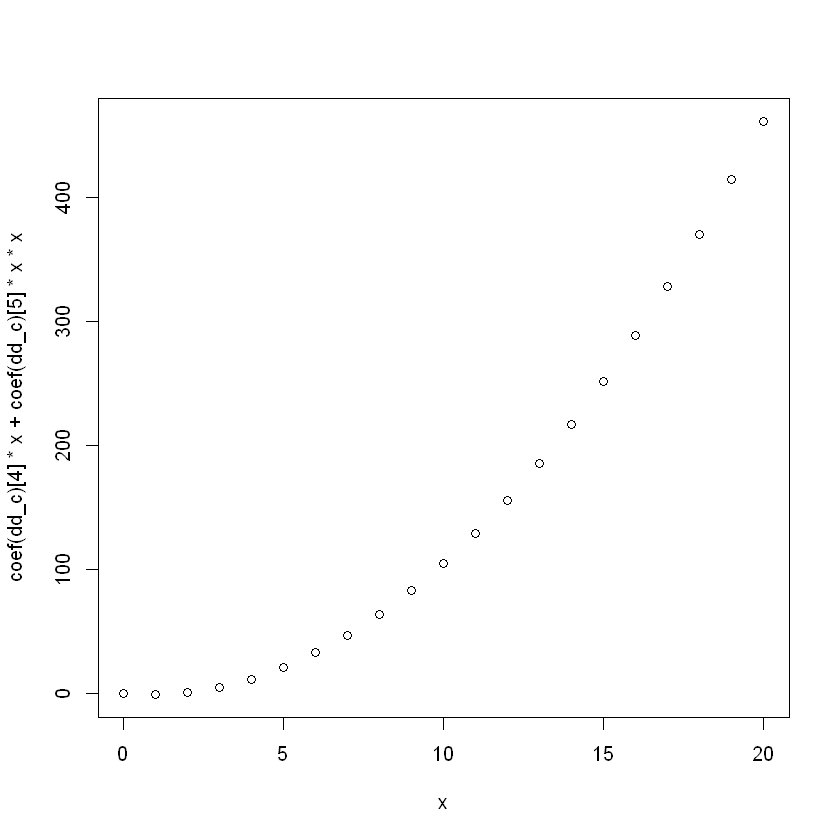

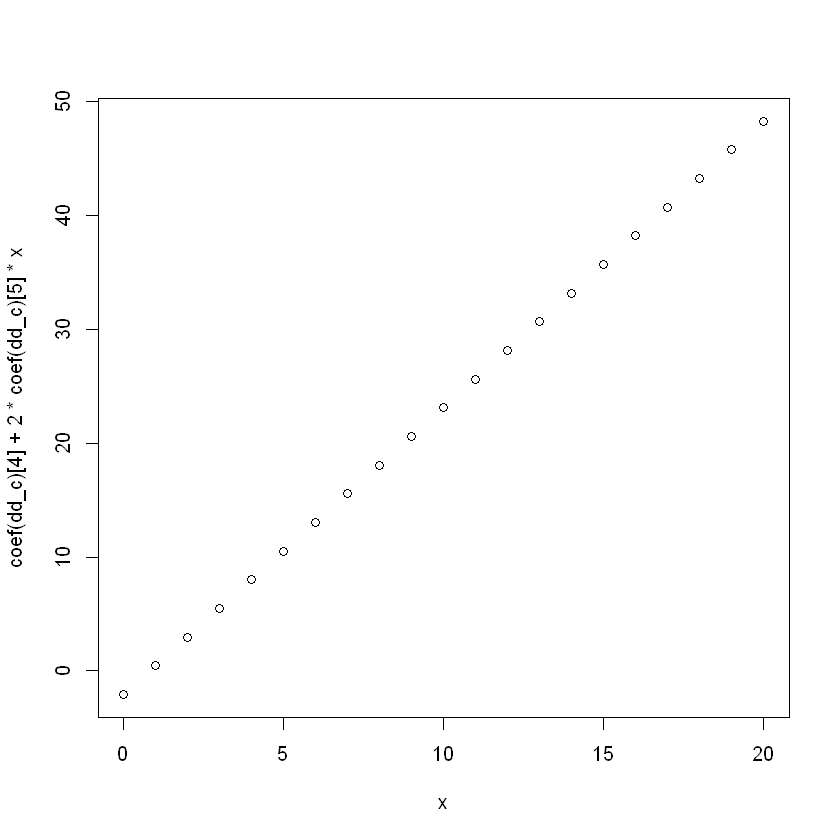

In [13]:
x<-seq(0,20,1)
plot(x, coef(dd_c)[4]*x+coef(dd_c)[5]*x*x)
plot(x, coef(dd_c)[4]+2*coef(dd_c)[5]*x)
# je cherche x tel que : coef(dd_c)[4]+2*coef(dd_c)[5]*x=0 (point de retournement)

# 5. Tester la robustesse des résultats

Quelle est l'hypothèse qui conditionne la validité de l'estimateur par double différence ? 

Peut-on tester cette hypothèse directement ?

Quelles sont les 3 manières de convaincre votre lecteur que l'hypothèse est bien validée ? Avez-vous des idées pour implémenter ces différents tests de robustesse ?

On réussit à trouver d'autres données pour les années précédentes: 1976 et 1974. Ces données se trouvent dans le fichier simulé : **TD9_kielmc_generated_forplacebo**.

On propose donc un test placebo. 

a) Ouvrir ces données. 

In [14]:
dsp<-readRDS("TD9_kielmc_generated_forplacebo")

b) On réalise d'abord le test placebo visuel en présentant l'évolution du prix moyen des maisons *price* dans le temps graphiquement, selon si les maisons sont proches ou loin de l'incinérateur *nearinc*.  

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.2976  1.0000  1.0000 

Eloigné  Proche 
    446     189

No summary function supplied, defaulting to `mean_se()`


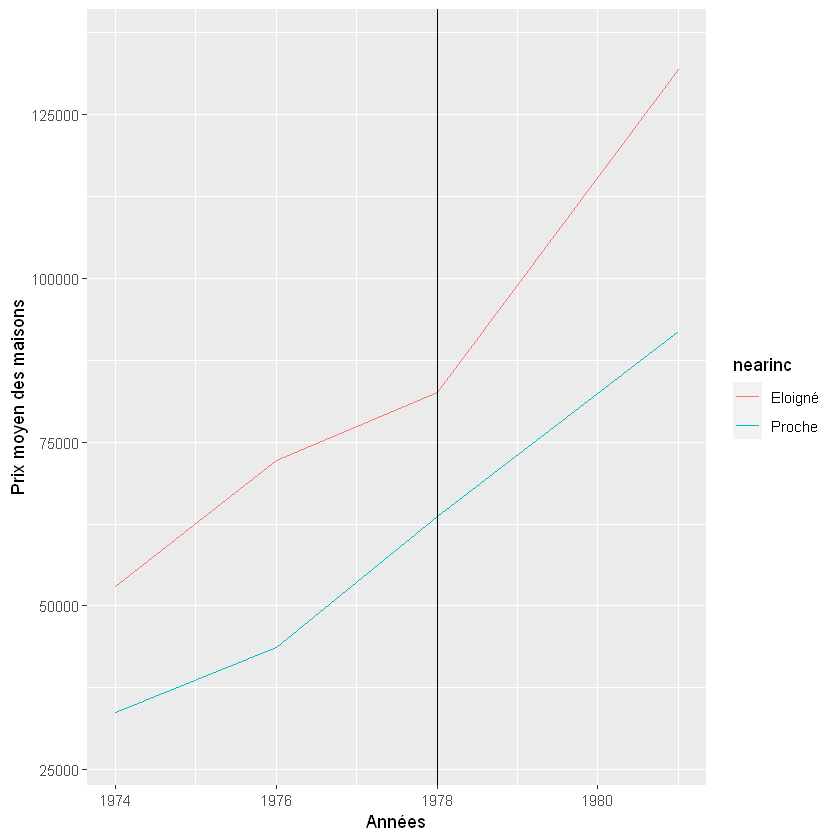

In [15]:
#test visuel : 
library(ggplot2)
summary(dsp$nearinc)
dsp$nearinc<-factor(dsp$nearinc, levels=c(0,1), labels=c("Eloigné","Proche"))
summary(dsp$nearinc)
ggplot(dsp, aes(x=year, y=price, color = nearinc)) +
    stat_summary(geom = 'line') +
    geom_vline(xintercept = 1978) + xlab("Années") + ylab("Prix moyen des maisons")

c) On estime formellement une régression placebo sur le sous-échantillon de 1974-1976.

In [16]:
dd_p<-lm(lprice~nearinc+factor(year)+nearinc:factor(year)+poly(age,2)+area+land+rooms+baths+intst,data=dsp[dsp$year<1978,])
summary(dd_p)


Call:
lm(formula = lprice ~ nearinc + factor(year) + nearinc:factor(year) + 
    poly(age, 2) + area + land + rooms + baths + intst, data = dsp[dsp$year < 
    1978, ])

Residuals:
     Min       1Q   Median       3Q      Max 
-15.4840  -0.1633   0.0307   0.3069   1.6362 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     8.014e+00  5.683e-01  14.102  < 2e-16 ***
nearincProche                   6.768e-02  2.373e-01   0.285  0.77566    
factor(year)1976                2.387e-02  1.491e-01   0.160  0.87292    
poly(age, 2)1                  -6.813e+00  1.318e+00  -5.171 4.24e-07 ***
poly(age, 2)2                   3.968e+00  1.463e+00   2.713  0.00705 ** 
area                            4.155e-04  1.221e-04   3.402  0.00076 ***
land                            1.565e-06  1.637e-06   0.956  0.33964    
rooms                           2.125e-01  8.773e-02   2.422  0.01603 *  
baths                           1.650e-01  1.

d) Conclure.